<a href="https://colab.research.google.com/github/pinkdolphin11/ESAA/blob/main/4_8_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**6. 사이킷런으로 수행하는 타이타닉 생존자 예측**

In [6]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
titanic_df = pd.read_csv(r'/content/gdrive/MyDrive/titanic_train.csv.csv')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [12]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info()) #로딩된 데이터 칼럼 타입 확인


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


** RangeIndex : DataFrame 인덱스의 범위를 나타내어 전체 로우 수를 알 수 있다.

DataFrame의 fillna() 함수로 Null 값 처리하기

In [9]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True) #Age의 Null 값을 평균 나이로 변경
titanic_df['Cabin'].fillna('N',inplace=True) #나머지 칼럼의 Null 값은 'N'으로 변경
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 개수',titanic_df.isnull().sum().sum()) #모든 칼럼의 Null 값이 없는지 확인

데이터 세트 Null 값 개수 0


In [10]:
print('Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [12]:
#Cabin 속성의 앞 문자만 추출
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [13]:
#성별에 따른 생존자 수 비교
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

여자 : 314명 중 233명 생존(74.2%)

남자 : 577명 중 109명 생존(18.8%)

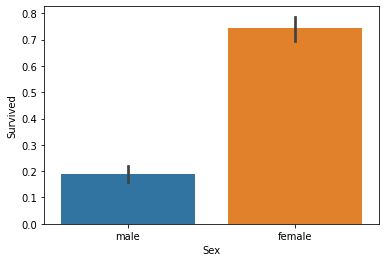

In [14]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

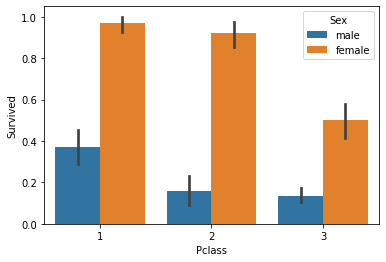

In [15]:
#부자와 가난한 사람 간의 생존 확률 비교 - 객실 등급과 성별에 따른 생존 확률
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

여자 : 일, 이등실에 따른 생존 확률 차이는 크지 않으나 삼등실의 경우 생존 확률이 상대적으로 떨어진다.

남자 : 일등실의 생존 확률이 이, 삼등실의 생존 확률보다 월등히 높다.

In [51]:
#Age에 따른 생존 확률
#Age의 값 종류가 많기 때문에 범위별로 분류해 카테고리 값 할당
#입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용
def get_category(age):
  cat=''
  if age <= -1: cat = 'Unknown' #오류 값
  elif age <=5: cat = 'Baby'
  elif age <=12: cat = 'Child'
  elif age <=18: cat = 'Teenager'
  elif age <=25: cat = 'Student'
  elif age <=35: cat = 'Young Adult'
  elif age <=60: cat = 'Adult'
  else : cat = 'Elderly'

  return cat

In [17]:
#막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [18]:
#X축의 값을 순차적으로 표시하기 위한 설정
group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

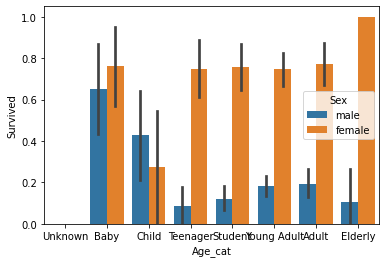

In [23]:
#lambda 식에 위에서 생성한 get_category 함수를 반환값으로 지정.
#get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)

지금까지 분석한 결과 Sex, Age, PClass 등이 중요하게 생존을 좌우하는 피처임을 확인할 수 있다.

남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환하자. 레이블 인코딩 적용. LabelEncoder 객체는 카테고리 값의 유형 수에 따라 0~(카테고리 유형 수-1)까지의 숫자 값으로 변환.

In [53]:
from sklearn import preprocessing

def encode_features(dataDF): #여러 칼럼을 encode_features() 함수를 새로 생성해 한 번에 변환
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le=preprocessing.LabelEncoder()
    le=le.fit(dataDF[feature])
    dataDF[feature]=le.transform(dataDF[feature])

  return dataDF

titanic_df=encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2


In [34]:
#Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(),inplace=True)
  df['Cabin'].fillna('N',inplace=True)
  df['Embarked'].fillna('N',inplace=True)
  df['Fare'].fillna(0,inplace=True)
  return df

In [35]:
#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
  return df

In [60]:
#레이블 인코딩 수행
from sklearn.preprocessing import LabelEncoder

def format_features(df):
  df['Cabin']=df['Cabin'].str[:1]
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le=LabelEncoder()
    le=le.fit(df[feature])
    df[feature]=le.transform(df[feature])
  return df

In [61]:
#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df=fillna(df)
  df=drop_features(df)
  df=format_features(df)
  return df

데이터 전처리를 수행하는 transform_features() 함수를 이용해 다시 원본 데이터를 가공하자. 원본 CSV 파일을 다시 로딩하고 타이타닉 생존자 데이터 세트의 레이블인 Survived 속성만 별도 분리해 클래스 결정값 데이터 세트로 만든다. 그리고 Survived 속성을 드롭해 피처 데이터 세트를 만든다. 이렇게 생성된 피처 데이터 세트에 transform_features()를 적용해 데이터를 가공한다.

In [62]:
#원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df = pd.read_csv(r'/content/gdrive/MyDrive/titanic_train.csv.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived',axis=1)

X_titanic_df=transform_features(X_titanic_df)

내려받은 학습 데이터 세트를 기반으로 해서 train_test_split()을 이용해 별도의 테스트 데이터 세트 추출

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=11) #테스트 데이터 세트 크기 : 전체의 20%

ML 알고리즘인 결정 트리, 랜덤 포레스트, 로지스틱 회귀를 이용해 타이타닉 생존자 예측

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [66]:
#결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf=DecisionTreeClassifier(random_state=11)
rf_clf=RandomForestClassifier(random_state=11)
lr_clf=LogisticRegression()

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train,y_train)
dt_pred=dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도:{0:4f}'.format(accuracy_score(y_test,dt_pred)))

#RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train,y_train)
rf_pred=rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:4f}'.format(accuracy_score(y_test,rf_pred)))

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:4f}'.format(accuracy_score(y_test,lr_pred)))

DecisionTreeClassifier 정확도:0.787709
RandomForestClassifier 정확도:0.854749
LogisticRegression 정확도: 0.849162


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


교차 검증 수행

In [67]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
  #폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
  kfold=KFold(n_splits=folds)
  scores=[]

  #KFold 교차 검증 수행
  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    #X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
    #Classifier 학습, 예측, 정확도 계산
    clf.fit(X_train,y_train)
    predictions=clf.predict(X_test)
    accuracy=accuracy_score(y_test,predictions)
    scores.append(accuracy)
    print("교차 검증 {0} 정확도: {1:4f}".format(iter_count,accuracy))

  #5개 fold에서의 평균 정확도 계산
  mean_score=np.mean(scores)
  print('평균 정확도:{0:4f}'.format(mean_score))
#exec_kfold 호출
exec_kfold(dt_clf,folds=5)

교차 검증 0 정확도: 0.754190
교차 검증 1 정확도: 0.780899
교차 검증 2 정확도: 0.786517
교차 검증 3 정확도: 0.769663
교차 검증 4 정확도: 0.820225
평균 정확도:0.782299


cross_val_score()를 이용한 교차 검증 수행

In [68]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(dt_clf,X_titanic_df,y_titanic_df,cv=5)
for iter_count, accuracy in enumerate(scores):
  print("교차 검증 {0} 정확도: {1:4f}".format(iter_count,accuracy))

print('평균 정확도: {0:4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.743017
교차 검증 1 정확도: 0.775281
교차 검증 2 정확도: 0.792135
교차 검증 3 정확도: 0.786517
교차 검증 4 정확도: 0.842697
평균 정확도: 0.787929


** cross_val_score()와 K 폴드의 평균 정확도가 약간 다른 이유는 cross_val_score()가 StratifiedKold를 이용해 폴드 세트를 분할하기 때문이다.

GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능 측정하기

CV는 5개의 폴드 세트를 지정하고, 하이퍼 파라미터는 max_depth, min_samples_split, min_samples_leaf를 변경하면서 성능 측정

최적 하이퍼 파라미터와 그때의 예측을 출력, 최적 하이퍼 파라미터로 학습된 Estimator를 이용해 위의 train_test_split()으로 분리된 테스트 데이터 세트에 예측을 수행해 예측 정확도 출력

In [69]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[2,3,5,10],'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}

grid_dclf=GridSearchCV(dt_clf,param_grid=parameters,scoring='accuracy',cv=5)
grid_dclf.fit(X_train,y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:4f}'.format(grid_dclf.best_score_))
best_dclf=grid_dclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions=best_dclf.predict(X_test)
accuracy=accuracy_score(y_test,dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.799183
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.871508


최적화된 하이퍼 파라미터로 DecisionTreeClassifier를 학습시킨 뒤 예측 정확도가 약 87.15%로 향상(8% 이상 증가한 것은 테스트용 데이터 세트가 작기 때문이다.)